# Assignment 2 Music Genre Classifier Workings - Benjamin Tam 889835

In [39]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier

def pre_process():
    
    
    # Training data
    train_features = pd.read_csv("train_features.csv")
    train_labels = pd.read_csv("train_labels.csv")

    # Validation data
    valid_features = pd.read_csv("valid_features.csv")
    valid_labels = pd.read_csv("valid_labels.csv")

    # Test data for kaggle
    test_features = pd.read_csv("test_features.csv")
    
    return train_features, train_labels, valid_features, valid_labels, test_features


train_features, train_labels, valid_features, valid_labels, test_features = pre_process()

# Find and Replace Metadata class data with int

genre_labels = {"genre" : {"soul and reggae" : 0, "pop" : 1, "punk" : 2, "jazz and blues" : 3, 
                           "dance and electronica" : 4, "folk" : 5, "classic pop and rock" : 6
                          ,"metal" : 7}}

# Dict to convert back to genre for kaggle.

genre_code_labels = {"genre" : {0 : "soul and reggae", 1: "pop", 2: "punk", 3 : "jazz and blues", 
                           4: "dance and electronica", 5: "folk", 6 : "classic pop and rock"
                          , 7 : "metal"}}


In [2]:
# GNB Functions

# Train model for Gaussian Naive Bayes
def train_gnb(train_features, train_labels):
    
    # Create GNB classifier
    gnb = GaussianNB()
    
    # Fit data
    gnb.fit(train_features, train_labels.values.ravel())
    
    return gnb

def predict_gnb(gnb, valid_features):
        return gnb.predict(valid_features)

In [3]:
# Decision Tree Functions

def train_tree(train_features, train_labels, depth):
    
    # Create decision tree classifier using training data
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)

    decision_tree.fit(train_features, train_labels)
    
    return decision_tree

def tree_predict(classifier, features):
    return classifier.predict(features)

In [4]:
# Neural Network MLP Functions

def train_mlp(train_features, train_labels, random_state=1, max_iter=300):
    mlp = MLPClassifier(random_state=random_state, max_iter=max_iter).fit(train_features, train_labels.values.ravel())
    return mlp

def predict_mlp(mlp, valid_features):
    return mlp.predict(valid_features)

In [5]:
# Evaluation Function
def evaluate(true_list, predict_list):
    # Takes the true list and predicted list and outputs metrics
    
    confusion_matrix = metrics.confusion_matrix(true_list, predict_list)
    accuracy = metrics.accuracy_score(true_list, predict_list)
    precf1 = metrics.precision_recall_fscore_support(true_list, predict_list)
    
    return confusion_matrix, accuracy, precf1

## Metadata feature model

In [6]:
# Preprocess Metadata Feature data

def meta_pre_process():
    # Metadata Features w Labels
    meta_train = train_features[['trackID', 'title', 'loudness', 'tempo', 'time_signature', 'key', 'mode','duration']]

    meta_labelled = pd.concat([meta_train.set_index('trackID'),train_labels.set_index('trackID')], axis=1, join='inner').reset_index()

    # Processing Feature data
    meta_train_features = meta_labelled[['loudness', 'tempo', 'time_signature', 'key', 'mode', 'duration']]

    meta_train_labels = train_labels[['genre']]
    meta_train_labels.replace(genre_labels, inplace = True)

    # Process Validation data
    meta_valid_features = valid_features[['loudness', 'tempo', 'time_signature', 'key', 'mode', 'duration']]

    meta_valid_labels = valid_labels[['genre']]
    meta_valid_labels.replace(genre_labels, inplace = True)

    # Test features data processing
    meta_test_features = test_features[['loudness', 'tempo', 'time_signature', 'key', 'mode', 'duration']]
    
    
    return meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features


meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features = meta_pre_process()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


### Zero-R/ Most-Frequent Baseline using Metadata Features

In [12]:
# Preprocess Metadata Feature
meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features = meta_pre_process()

dummy = DummyClassifier(strategy="most_frequent")

# Fit training data
dummy.fit(meta_train_features, meta_train_labels)

# Test model on validation data
dummy.score(meta_valid_features, meta_valid_labels)

meta_predicted_valid_labels = dummy.predict(meta_valid_features)

# evaluation of valid
cm, acc, precf1 = evaluate(meta_valid_labels, meta_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))


Confusion Matrix: 
[[ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0 66  0]]
Accuracy: 0.12222222222222222
Precision: [0.         0.         0.         0.         0.         0.
 0.12222222 0.        ]
Recall: [0. 0. 0. 0. 0. 0. 1. 0.]
F1: [0.         0.         0.         0.         0.         0.
 0.21782178 0.        ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree on Metadata

In [7]:
# Preprocess Metadata Feature
meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features = meta_pre_process()

# Train the decision tree model for metadata, with 
meta_decision_tree = train_tree(meta_train_features, meta_train_labels, 4)

# Decision tree using test features (Prediction)

# meta_decision_tree.predict(meta_test_features)
tree_predict(meta_decision_tree, meta_test_features)

meta_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : tree_predict(meta_decision_tree, meta_test_features)})


# Replace genre codes back to labels
meta_test_df.replace(genre_code_labels, inplace = True)

meta_test_df

# Output to CSV for kaggle
# meta_test_df.to_csv(r'meta_test_0610.csv', index = False, header = True)


# # Decision tree evaluatuion for valid_features and valid_labels
meta_decision_tree.score(meta_valid_features,meta_valid_labels)

meta_predicted_valid_labels = meta_decision_tree.predict(meta_valid_features)


# # Plot tree
# tree.plot_tree(meta_decision_tree)

# meta_decision_tree.get_depth()


# evaluation of valid
cm, acc, precf1 = evaluate(meta_valid_labels, meta_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))



Confusion Matrix: 
[[ 0  0  2  0  2  5 42  7]
 [ 0  0  5  0  0 14 51  4]
 [ 0  0 23  0  0  2 14  5]
 [ 0  0  0  0  1 22 20  1]
 [ 0  0  6  0  1  5 19 14]
 [ 0  0  1  0  0 24 34  5]
 [ 0  0  7  0  0 12 36  0]
 [ 0  0 17  0  0  0  5 44]]
Accuracy: 0.28444444444444444
Precision: [0.         0.         0.37704918 0.         0.25       0.28571429
 0.16289593 0.55      ]
Recall: [0.         0.         0.52272727 0.         0.02222222 0.375
 0.65454545 0.66666667]
F1: [0.         0.         0.43809524 0.         0.04081633 0.32432432
 0.26086957 0.60273973]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# Get accuracy for training dataset
meta_decision_tree.score(meta_train_features,meta_train_labels)

0.3769210731961448

In [27]:
# Finding the max number of levels that provides the highest level of accuracy

tree_accuracy = []
for i in range(1, 20):
    meta_decision_tree = train_tree(meta_train_features, meta_train_labels, i)
    tree_accuracy.append(meta_decision_tree.score(meta_valid_features, meta_valid_labels))

tree_accuracy.index((max(tree_accuracy)))
max(tree_accuracy)

0.28444444444444444

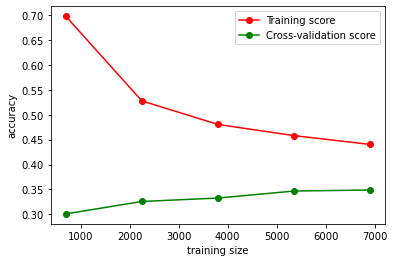

In [14]:
# Learning Curve for Decision Tree Classifier on Metadata Features
estimator = meta_decision_tree
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_train_features, meta_train_labels, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Neural Network MLP on Metadata

In [9]:
# Preprocess Metadata Feature
meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features = meta_pre_process()


# Train MLP Classifier
mlp = train_mlp(meta_train_features, meta_train_labels)

# Predict validation labels
mlp_valid_predicted_labels = predict_mlp(mlp, meta_valid_features)


# Evaluation of NN MLP
cm, acc, precf1 = evaluate(meta_valid_labels, mlp_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


Confusion Matrix: 
[[ 5  0  7  3  0 16 14 13]
 [ 4  0 11  4  0 30 21  4]
 [ 1  1 20  1  0  8  6  7]
 [ 4  0  2 10  0 21  5  2]
 [ 1  0  9  3  0  9  5 18]
 [ 3  1  2  3  0 43  8  4]
 [ 1  0  8  3  0 29 13  1]
 [ 1  1 14  0  0  0  3 47]]
Accuracy: 0.30666666666666664
Precision: [0.25       0.         0.2739726  0.37037037 0.         0.27564103
 0.17333333 0.48958333]
Recall: [0.0862069  0.         0.45454545 0.22727273 0.         0.671875
 0.23636364 0.71212121]
F1: [0.12820513 0.         0.34188034 0.28169014 0.         0.39090909
 0.2        0.58024691]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Get accuracy for MLP on training data for evaluation
mlp.score(meta_train_features,meta_train_labels)

0.3472258400625163

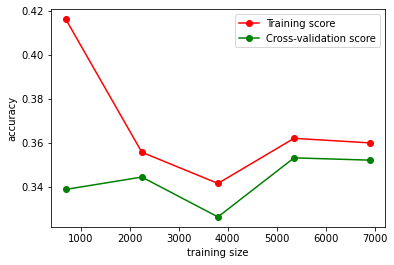

In [16]:
# Learning Curve for Neural Network MLP Classifier on Metadata Features
estimator = mlp
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_train_features, meta_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Gaussian NB on Meta Data

In [11]:
# Preprocess Metadata Feature
meta_train_features, meta_train_labels, meta_valid_features, meta_valid_labels, meta_test_features = meta_pre_process()


# Create classifier
gnb = train_gnb(meta_train_features, meta_train_labels)

# Get predictions (For validation Data)
gnb_valid_predicted_labels = predict_gnb(gnb, meta_valid_features)

# Evaluation of gnb (for validation data)
cm, acc, precf1 = evaluate(meta_valid_labels, gnb_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))


# GNB classifier and output to CSV for kaggle
# gnb_meta_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : gnb.predict(meta_test_features)})

# Replace genre codes back to labels
# gnb_meta_test_df.replace(genre_code_labels, inplace = True)

# gnb_meta_test_df

# Output to CSV for kaggle
# gnb_meta_test_df.to_csv(r'gnb_meta_test_0610.csv', index = False, header = True)

Confusion Matrix: 
[[ 4  3 13  0  1  5 21 11]
 [ 5  4  9  0  0  8 47  1]
 [ 1  3 19  0  0  6 12  3]
 [ 7  2  1  0  1 17 16  0]
 [ 4  4 10  0  0  7  9 11]
 [ 2  0  3  0  0 32 25  2]
 [ 1  0  8  0  0 14 31  1]
 [ 0 12 16  0  0  0  7 31]]
Accuracy: 0.2688888888888889
Precision: [0.16666667 0.14285714 0.24050633 0.         0.         0.35955056
 0.18452381 0.51666667]
Recall: [0.06896552 0.05405405 0.43181818 0.         0.         0.5
 0.56363636 0.46969697]
F1: [0.09756098 0.07843137 0.30894309 0.         0.         0.41830065
 0.27802691 0.49206349]


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Get accuracy for MLP on training data for evaluation
gnb.score(meta_train_features,meta_train_labels)

0.3586871581140922

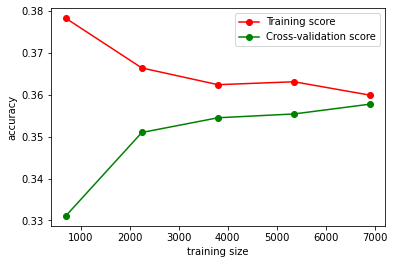

In [30]:
# Learning Curve for Gaussian NB Classifier on Metadata Features
estimator = gnb
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_train_features, meta_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Audio Features Model

In [14]:
# Preprocessing data for audio features

def audio_pre_process():

    # Audio training data Features w Labels
    audio_train_features = train_features.iloc[:,9:]

    audio_train_labels = train_labels[['genre']]
    audio_train_labels.replace(genre_labels, inplace = True)

    # Audio validation data features and labels
    audio_valid_features = valid_features.iloc[:,9:]

    audio_valid_labels = valid_labels[['genre']]
    audio_valid_labels.replace(genre_labels, inplace = True)

    # Audio test features
    audio_test_features = test_features.iloc[:,9:]
    
    return audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features

audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features = audio_pre_process()


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


### Zero-R/ Most-frequent Baseline

In [40]:
# Preprocess Audio Feature
audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features = audio_pre_process()

dummy = DummyClassifier(strategy="most_frequent")

# Fit training data
dummy.fit(audio_train_features, audio_train_labels)

# Test model on validation data
dummy.score(audio_valid_features, audio_valid_labels)

audio_predicted_valid_labels = dummy.predict(audio_valid_features)

# evaluation of valid
cm, acc, precf1 = evaluate(audio_valid_labels, audio_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))

Confusion Matrix: 
[[ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0 66  0]]
Accuracy: 0.12222222222222222
Precision: [0.         0.         0.         0.         0.         0.
 0.12222222 0.        ]
Recall: [0. 0. 0. 0. 0. 0. 1. 0.]
F1: [0.         0.         0.         0.         0.         0.
 0.21782178 0.        ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Neural Network MLP for Audio Features

In [15]:
# Preprocess Audio Feature
audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features = audio_pre_process()


# Train MLP Classifier
mlp = train_mlp(audio_train_features, audio_train_labels)

# Predict validation labels
mlp_valid_predicted_labels = predict_mlp(mlp, audio_valid_features)


# Evaluation of NN MLP
cm, acc, precf1 = evaluate(audio_valid_labels, mlp_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))

Confusion Matrix: 
[[ 5 16  2  0  3 28  4  0]
 [ 0 24  0  0  0 47  3  0]
 [ 0  4 28  0  0  7  0  5]
 [ 0  2  3  0  0 36  2  1]
 [ 0 12  5  1  9 13  5  0]
 [ 0  8  1  0  0 52  3  0]
 [ 1  7  4  0  0 40  3  0]
 [ 0  0 40  0  2  3  1 20]]
Accuracy: 0.31333333333333335
Precision: [0.83333333 0.32876712 0.3373494  0.         0.64285714 0.2300885
 0.14285714 0.76923077]
Recall: [0.0862069  0.32432432 0.63636364 0.         0.2        0.8125
 0.05454545 0.3030303 ]
F1: [0.15625    0.32653061 0.44094488 0.         0.30508475 0.35862069
 0.07894737 0.43478261]


In [17]:
# Get accuracy for MLP on training data for evaluation
mlp.score(audio_train_features,audio_train_labels)

0.44868455326908047

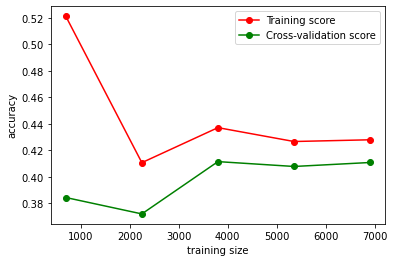

In [133]:
# Learning Curve for Neural Network MLP Classifier on Audio Features
estimator = mlp
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, audio_train_features, audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### GNB Model for Audio Features

In [18]:
# Preprocess Audio Feature
audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features = audio_pre_process()

# Create classifier
gnb = train_gnb(audio_train_features, audio_train_labels)


# Get predictions (For validation Data)
gnb_valid_predicted_labels = predict_gnb(gnb, audio_valid_features)

# Evaluation of gnb (for validation data)
cm, acc, precf1 = evaluate(audio_valid_labels, gnb_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))


# GNB classifier and output to CSV for kaggle

# gnb_audio_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : gnb.predict(audio_test_features)})

# Replace genre codes back to labels
# gnb_audio_test_df.replace(genre_code_labels, inplace = True)


# Output to CSV for kaggle
# gnb_audio_test_df.to_csv(r'gnb_audio_test_0610.csv', index = False, header = True)

Confusion Matrix: 
[[41  5  0  4  6  1  1  0]
 [ 2 41  0  6  0 16  9  0]
 [ 0  6 13  1  0  4  6 14]
 [ 6  4  1 13  2 12  4  2]
 [ 5  7  4  5 10  6  6  2]
 [ 5 13  0  3  0 25 18  0]
 [ 2  9  0  5  1 13 25  0]
 [ 0  2 10  0  1  0  0 53]]
Accuracy: 0.4911111111111111
Precision: [0.67213115 0.47126437 0.46428571 0.35135135 0.5        0.32467532
 0.36231884 0.74647887]
Recall: [0.70689655 0.55405405 0.29545455 0.29545455 0.22222222 0.390625
 0.45454545 0.8030303 ]
F1: [0.68907563 0.50931677 0.36111111 0.32098765 0.30769231 0.35460993
 0.40322581 0.77372263]


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


In [19]:
# Get accuracy for GNB on training data for evaluation
gnb.score(audio_train_features,audio_train_labels)

0.41885907788486587

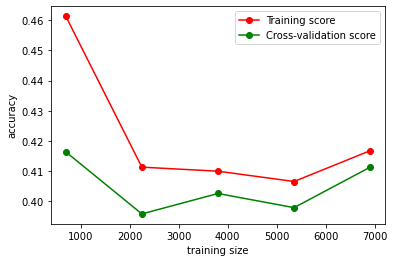

In [137]:
# Learning Curve for Gaussian NB Classifier on Audio Features
estimator = gnb
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, audio_train_features, audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Decision tree model for Audio Features

In [20]:
# Preprocess Audio Feature
audio_train_features, audio_train_labels, audio_valid_features, audio_valid_labels, audio_test_features = audio_pre_process()

# Train the decision tree model
audio_decision_tree = train_tree(audio_train_features, audio_train_labels, 8)

# # Decision tree evaluatuion for valid_features and valid_labels
audio_decision_tree.score(audio_valid_features, audio_valid_labels)

audio_predicted_valid_labels = audio_decision_tree.predict(audio_valid_features)

# evaluation of valid
cm, acc, precf1 = evaluate(audio_valid_labels, audio_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))



# Decision tree using test features (Prediction)

# tree_predict(audio_decision_tree, audio_test_features)
# audio_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : tree_predict(audio_decision_tree, audio_test_features)})


# Replace genre codes back to labels
# audio_test_df.replace(genre_code_labels, inplace = True)

# audio_test_df

# # Output to CSV for kaggle
# audio_test_df.to_csv(r'tree_audio_test_0610.csv', index = False, header = True)

# # Plot tree
# tree.plot_tree(meta_decision_tree)



C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


Confusion Matrix: 
[[30  2  0  0  5 13  7  1]
 [ 4 25  0  0  0 33 12  0]
 [ 0  4 17  0  0  3  9 11]
 [ 1  3  4  4  3 22  6  1]
 [ 6  6  6  1  4 14  3  5]
 [ 3  2  2  0  1 38 18  0]
 [ 2  2  3  3  2 22 20  1]
 [ 0  1 20  0  0  2  2 41]]
Accuracy: 0.3977777777777778
Precision: [0.65217391 0.55555556 0.32692308 0.5        0.26666667 0.2585034
 0.25974026 0.68333333]
Recall: [0.51724138 0.33783784 0.38636364 0.09090909 0.08888889 0.59375
 0.36363636 0.62121212]
F1: [0.57692308 0.42016807 0.35416667 0.15384615 0.13333333 0.36018957
 0.3030303  0.65079365]


In [21]:
# Get accuracy for tree on training data for evaluation
audio_decision_tree.score(audio_train_features,audio_train_labels)

0.596769992185465

In [45]:
# Find Best performing max_depth
tree_accuracy = []
for i in range(1, 20):
    audio_decision_tree = train_tree(audio_train_features, audio_train_labels, i)
    tree_accuracy.append(audio_decision_tree.score(audio_valid_features, audio_valid_labels))

In [49]:
tree_accuracy.index((max(tree_accuracy)))
max(tree_accuracy)

0.4

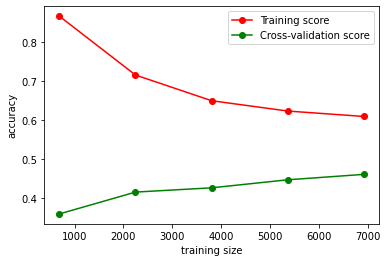

In [139]:
# Learning Curve for Decision Tree Classifier on Audio Features
estimator = audio_decision_tree
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, audio_train_features, audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

## Audio & Metadata features

In [22]:
# Pre Process Metadata and Audio Features
def meta_audio_pre_process():
    
    # Preprocessing data for audio and metadata features
    train_features, train_labels, valid_features, valid_labels, test_features = pre_process()

    # get training features
    meta_audio_train_features = train_features.copy()
    meta_audio_train_features.drop(['trackID', 'title', 'tags'], axis=1, inplace=True)
    meta_audio_train_features

    # get training labels
    meta_audio_train_labels = train_labels[['genre']]
    meta_audio_train_labels.replace(genre_labels, inplace = True)

    # get valid features
    meta_audio_valid_features = valid_features.copy()
    meta_audio_valid_features.drop(['trackID', 'title', 'tags'], axis=1, inplace=True)
    meta_audio_valid_features

    # get valid labels
    meta_audio_valid_labels = valid_labels[['genre']]
    meta_audio_valid_labels.replace(genre_labels, inplace = True)

    # Audio test features
    meta_audio_test_features = test_features.copy()
    meta_audio_test_features.drop(['trackID', 'title', 'tags'], axis=1, inplace=True)
    
    return meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features

meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()



    


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


### Zero-R/ Most Frequent baseline for Audio and Metadata features

In [68]:

# Preprocess Metadata and Audio Features
meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()

dummy = DummyClassifier(strategy="most_frequent")

# Fit training data
dummy.fit(meta_audio_train_features, meta_audio_train_labels)

# Test model on validation data
dummy.score(meta_audio_valid_features, meta_audio_valid_labels)

meta_audio_predicted_valid_labels = dummy.predict(meta_audio_valid_features)

# evaluation of valid
cm, acc, precf1 = evaluate(meta_audio_valid_labels, meta_audio_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))

Confusion Matrix: 
[[ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0 66  0]]
Accuracy: 0.12222222222222222
Precision: [0.         0.         0.         0.         0.         0.
 0.12222222 0.        ]
Recall: [0. 0. 0. 0. 0. 0. 1. 0.]
F1: [0.         0.         0.         0.         0.         0.
 0.21782178 0.        ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GNB On Audio & Metadata Features

In [23]:
# Preprocess Metadata and Audio Features
meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()

# Create classifier
gnb = train_gnb(meta_audio_train_features, meta_audio_train_labels)

# Get predictions (For validation Data)

gnb_valid_predicted_labels = predict_gnb(gnb, meta_audio_valid_features)


# Evaluation of gnb (for validation data)
cm, acc, precf1 = evaluate(meta_audio_valid_labels, gnb_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))


# GNB classifier and output to CSV for kaggle

# gnb_meta_audio_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : gnb.predict(meta_audio_test_features)})

# Replace genre codes back to labels
# gnb_meta_audio_test_df.replace(genre_code_labels, inplace = True)


# Output to CSV for kaggle
# gnb_meta_audio_test_df.to_csv(r'gnb_meta_audio_test_0610.csv', index = False, header = True)

Confusion Matrix: 
[[41  4  0  4  6  1  2  0]
 [ 2 41  0  5  0 17  9  0]
 [ 0  7 16  1  0  4  5 11]
 [ 6  6  1 13  2 11  3  2]
 [ 4  6  4  5 12  7  4  3]
 [ 5 13  0  3  0 25 18  0]
 [ 2 10  0  5  1 13 24  0]
 [ 0  1  7  0  1  0  1 56]]
Accuracy: 0.5066666666666667
Precision: [0.68333333 0.46590909 0.57142857 0.36111111 0.54545455 0.32051282
 0.36363636 0.77777778]
Recall: [0.70689655 0.55405405 0.36363636 0.29545455 0.26666667 0.390625
 0.43636364 0.84848485]
F1: [0.69491525 0.50617284 0.44444444 0.325      0.35820896 0.35211268
 0.39669421 0.8115942 ]


In [24]:
# Get accuracy for gnb on training data for evaluation
gnb.score(meta_audio_train_features,meta_audio_train_labels)

0.4368325084657463

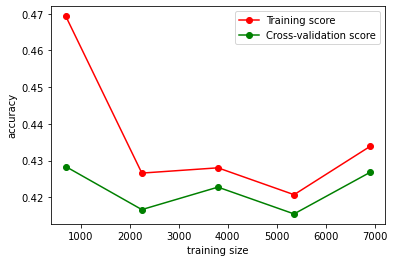

In [144]:

# Learning Curve for Gaussian NB Classifier on Metadata and Audio Features
estimator = gnb
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_audio_train_features, meta_audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Decision Tree on Audio & Metadata features

In [25]:
# Preprocess Metadata and Audio Features
meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()

# Train the decision tree model
meta_audio_decision_tree = train_tree(meta_audio_train_features, meta_audio_train_labels, 2)

# # Decision tree evaluatuion for valid_features and valid_labels
meta_audio_decision_tree.score(meta_audio_valid_features, meta_audio_valid_labels)

meta_audio_predicted_valid_labels = meta_audio_decision_tree.predict(meta_audio_valid_features)


# evaluation of valid
cm, acc, precf1 = evaluate(meta_audio_valid_labels, meta_audio_predicted_valid_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format
      (cm, acc, precf1[0], precf1[1], precf1[2]))


# Decision tree using test dataset features (Prediction)

# tree_predict(meta_audio_decision_tree, meta_audio_test_features)

# meta_audio_test_df = pd.DataFrame({"trackID" : test_features['trackID'], "genre" : tree_predict(meta_audio_decision_tree, meta_audio_test_features)})


# Replace genre codes back to labels
# meta_audio_test_df.replace(genre_code_labels, inplace = True)

# meta_audio_test_df

# # Output to CSV for kaggle
# meta_audio_test_df.to_csv(r'tree_meta_audio_test_0610.csv', index = False, header = True)

# # Plot tree
# tree.plot_tree(meta_decision_tree)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


Confusion Matrix: 
[[51  0  0  0  0  6  0  1]
 [ 6  0  0  0  0 67  0  1]
 [ 2  0  0  0  0 18  0 24]
 [15  0  0  0  0 27  0  2]
 [27  0  0  0  0 15  0  3]
 [16  0  0  0  0 45  0  3]
 [18  0  0  0  0 34  0  3]
 [ 2  0  0  0  0 10  0 54]]
Accuracy: 0.3333333333333333
Precision: [0.37226277 0.         0.         0.         0.         0.2027027
 0.         0.59340659]
Recall: [0.87931034 0.         0.         0.         0.         0.703125
 0.         0.81818182]
F1: [0.52307692 0.         0.         0.         0.         0.31468531
 0.         0.68789809]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Get accuracy for tree on training data for evaluation
meta_audio_decision_tree.score(meta_audio_train_features,meta_audio_train_labels)

0.36910653816097944

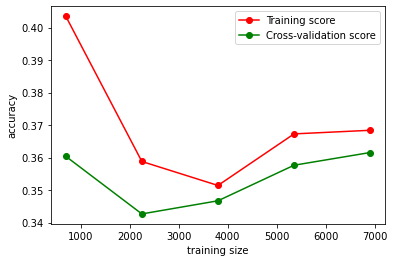

In [146]:
# Learning Curve for Decision Tree Classifier on Metadata and Audio Features
estimator = meta_audio_decision_tree
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_audio_train_features, meta_audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Neural Network MLP on Audio and Metadata Features

In [27]:

# Preprocessing data for audio and metadata features
meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()


# Train MLP Classifier
mlp = train_mlp(meta_audio_train_features, meta_audio_train_labels)

# Predict validation labels
mlp_valid_predicted_labels = predict_mlp(mlp, meta_audio_valid_features)

# Evaluation of NN MLP
cm, acc, precf1 = evaluate(meta_audio_valid_labels, mlp_valid_predicted_labels)
print("Confusion Matrix: \n{}\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(cm, acc, precf1[0], precf1[1], precf1[2]))

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


Confusion Matrix: 
[[39  0  0  6  5  0  8  0]
 [ 8  0  0  3  1  2 60  0]
 [ 1  0 25  0  0  0 16  2]
 [10  0  1 19  3  1  9  1]
 [13  1  1  4  8  2 14  2]
 [ 3  1  0  1  2  2 55  0]
 [ 8  2  3  0  1  0 41  0]
 [ 1  1 23  0  2  0  3 36]]
Accuracy: 0.37777777777777777
Precision: [0.46987952 0.         0.47169811 0.57575758 0.36363636 0.28571429
 0.19902913 0.87804878]
Recall: [0.67241379 0.         0.56818182 0.43181818 0.17777778 0.03125
 0.74545455 0.54545455]
F1: [0.55319149 0.         0.51546392 0.49350649 0.23880597 0.05633803
 0.31417625 0.6728972 ]


In [28]:
# Get accuracy for MLP on training data for evaluation
mlp.score(meta_audio_train_features,meta_audio_train_labels)

0.48619432143787444

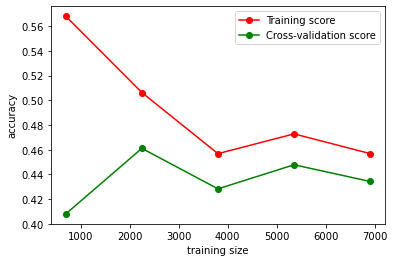

In [148]:
# Learning Curve for Neural Network MLP Classifier on Metadata and Audio Features
estimator = mlp
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, meta_audio_train_features, meta_audio_train_labels.values.ravel(), scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

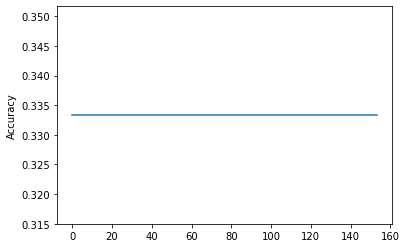

In [61]:
# For decision tree
accuracy = []
for i in range(1, 155):
    accuracy.append(feature_select(i))
plt.plot(accuracy)
plt.ylabel('Accuracy')
plt.show()

In [63]:
accuracy

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333

### Bagging on Metadata and Audio Features

In [38]:
gnb
meta_audio_decision_tree
mlp

# Preprocessing data for audio and metadata features
meta_audio_train_features, meta_audio_train_labels, meta_audio_valid_features, meta_audio_valid_labels, meta_audio_test_features = meta_audio_pre_process()

bag1 = BaggingClassifier(base_estimator=gnb).fit(meta_audio_train_features, meta_audio_train_labels.values.ravel())
bag2 = BaggingClassifier(base_estimator=meta_audio_decision_tree).fit(meta_audio_train_features, meta_audio_train_labels.values.ravel())
bag3 = BaggingClassifier(base_estimator=mlp).fit(meta_audio_train_features, meta_audio_train_labels.values.ravel())

print("GNB",bag1.score(meta_audio_valid_features, meta_audio_valid_labels.values.ravel()))
print("Tree",bag2.score(meta_audio_valid_features, meta_audio_valid_labels.values.ravel()))
print("MLP",bag3.score(meta_audio_valid_features, meta_audio_valid_labels.values.ravel()))





C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


GNB 0.4911111111111111
Tree 0.32
MLP 0.41555555555555557
